## Grid Search Hyperparameter optimization (completed)

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complete this case study, you'll use the Pima Indian diabetes dataset from Kaggle and k-nearest neighbors (KNN). Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# set random seed to try and make this exercise and its solutions reproducible (NB: this is just for teaching purposes and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


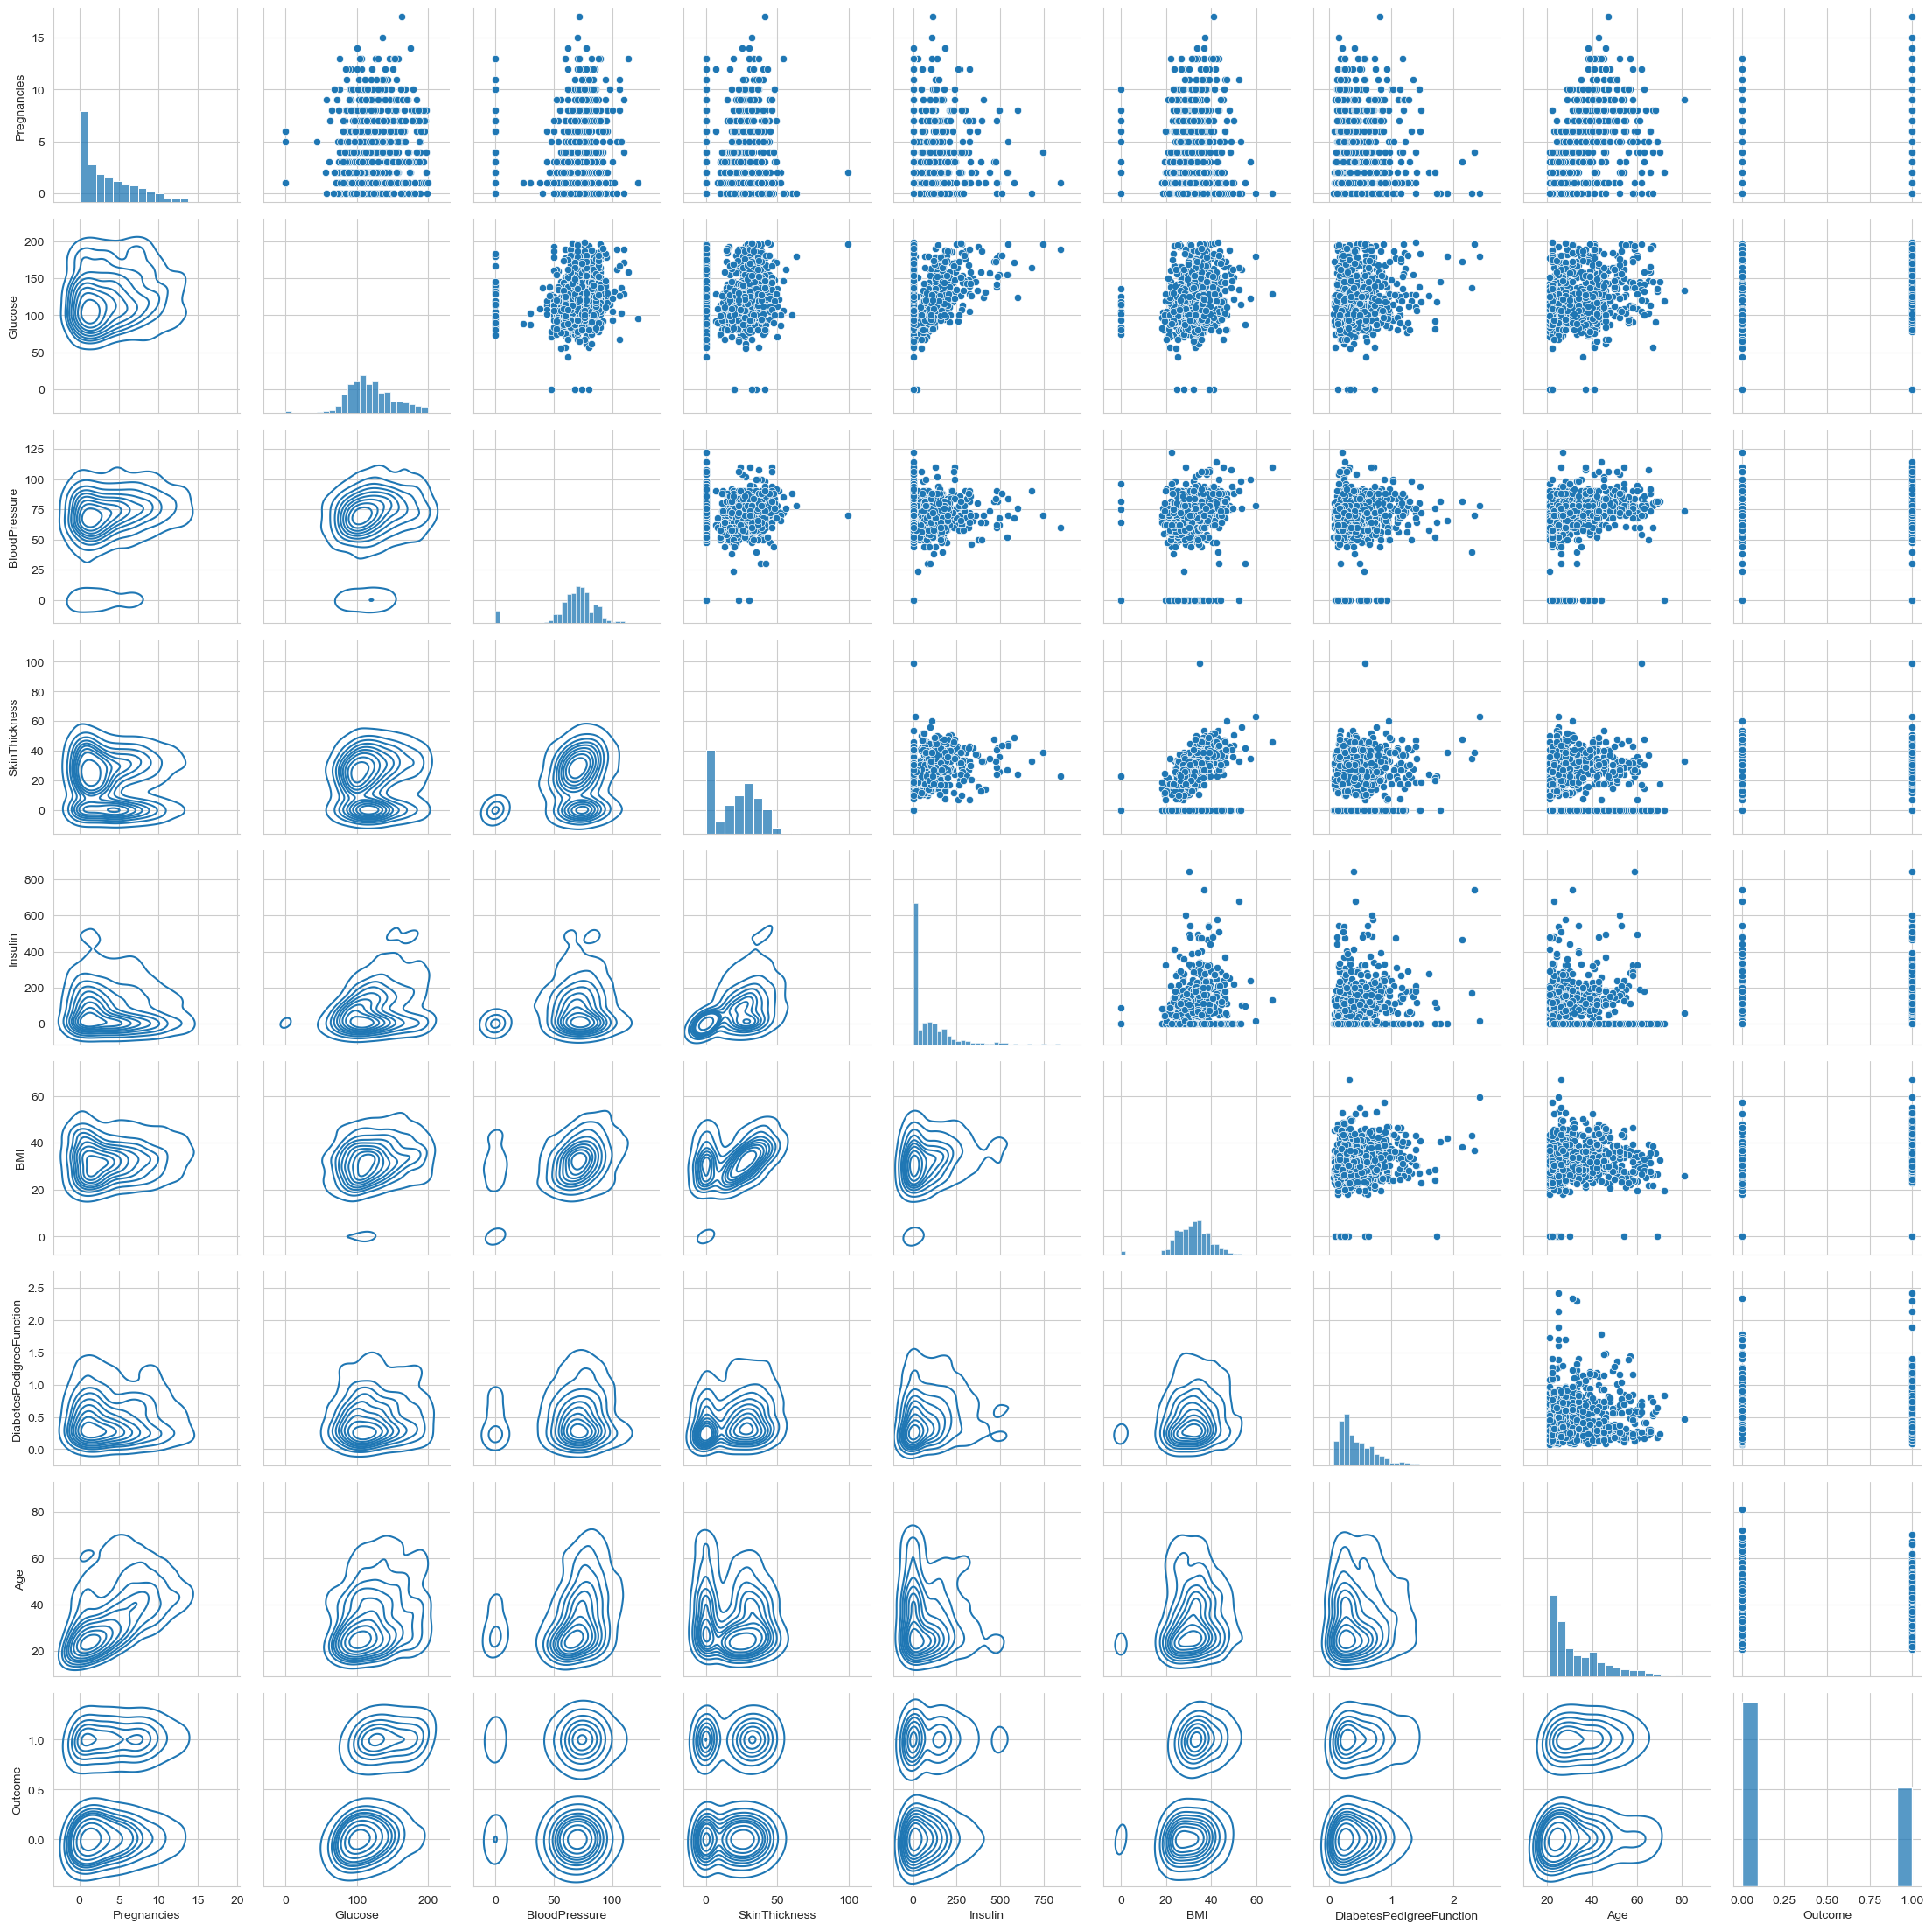

In [5]:
#pd.option_context('mode.use_inf_as_na', True)
g = sns.PairGrid(diabetes_data)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot);  # Pair plot of the DataFrame df

**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan.</font>**

In [6]:
cols_w_missings = ['Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[cols_w_missings] = diabetes_data[cols_w_missings].replace({0: np.NaN})

**<font color='teal'> Plot histograms of each column. </font>**

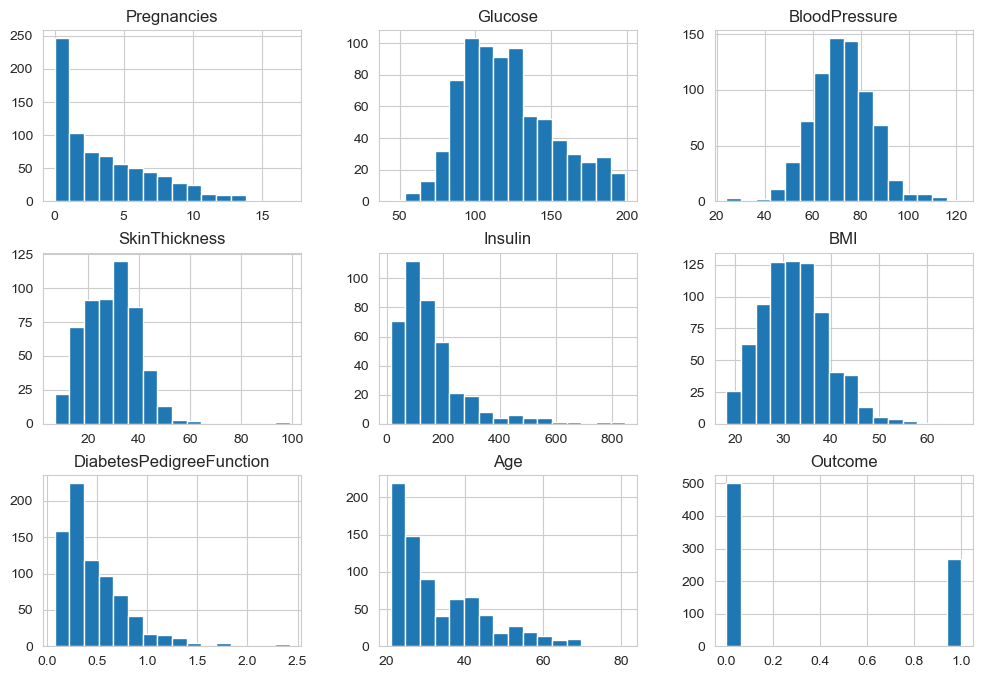

In [7]:
diabetes_data.hist(figsize=(12, 8), bins=16);

#### Replace the zeros with mean and median values.

In [8]:
diabetes_data['Glucose'] = diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean())
diabetes_data['BloodPressure'] = diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean())
diabetes_data['SkinThickness'] = diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median())
diabetes_data['Insulin'] = diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median())
diabetes_data['BMI'] = diabetes_data['BMI'].fillna(diabetes_data['BMI'].median())

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

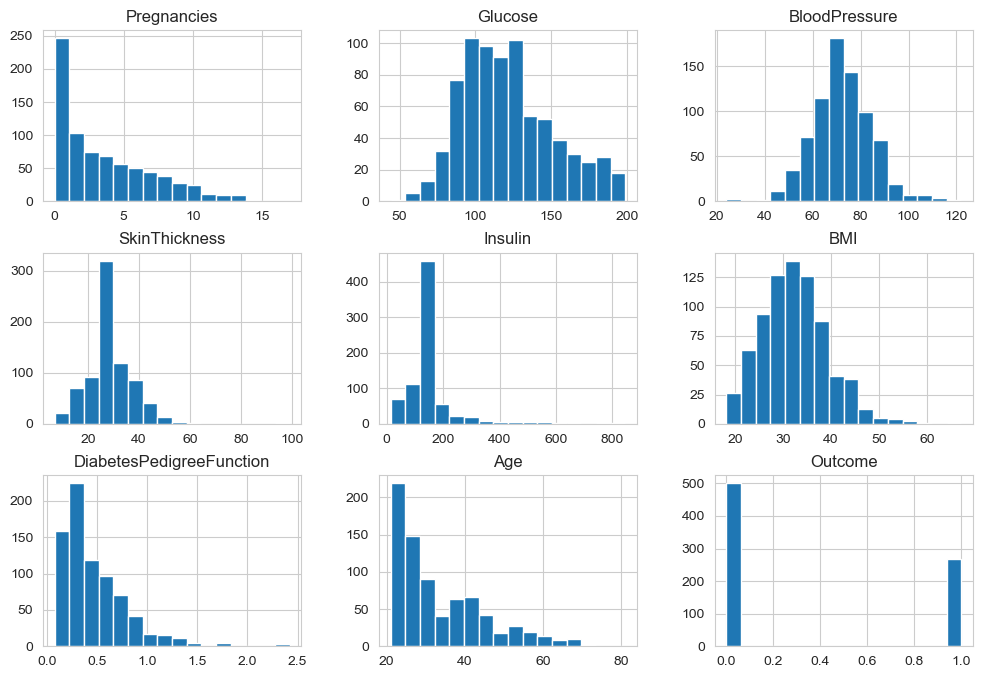

In [9]:
diabetes_data.hist(figsize=(12, 8), bins=16);

#### Plot the correlation matrix heatmap

Correlation between various features


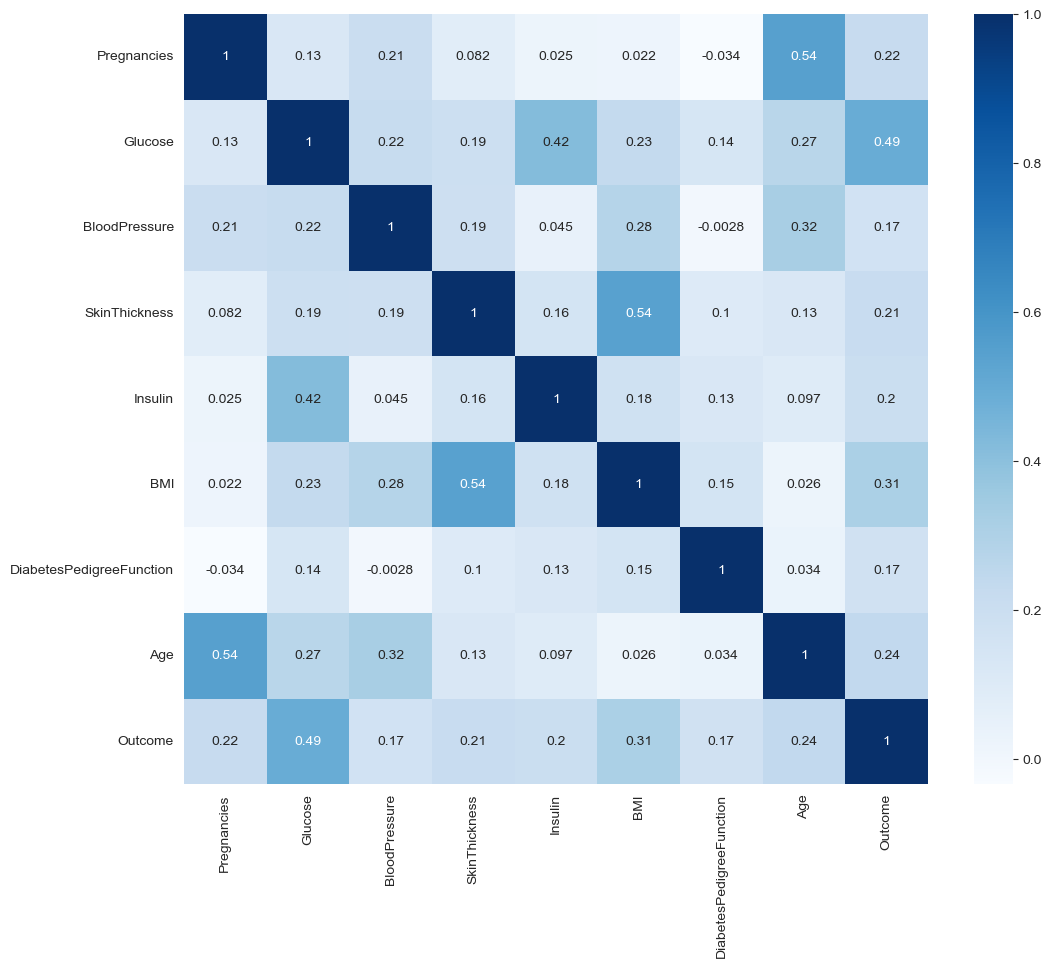

In [10]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True, cmap='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [11]:
X = diabetes_data.drop(columns=['Outcome'])
y = diabetes_data['Outcome']

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_seed_number)

**<font color='teal'> Using Sklearn, standardize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [13]:
scaler_train = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler_train.transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler_train.transform(X_test), columns=X.columns)

X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,576.0,-4.317534e-17,1.000869,-1.132847,-0.830054,-0.224467,0.683914,4.014642
Glucose,576.0,-3.824102e-16,1.000869,-2.585850,-0.722559,-0.123644,0.550136,2.571474
BloodPressure,576.0,-6.167906e-16,1.000869,-3.993239,-0.684200,-0.022393,0.639415,4.113906
SkinThickness,576.0,5.088522e-17,1.000869,-2.474438,-0.566597,0.029603,0.387323,4.083764
Insulin,576.0,1.233581e-16,1.000869,-1.433543,-0.230017,-0.173247,-0.144862,8.012998
BMI,576.0,-2.991434e-16,1.000869,-2.054325,-0.733834,-0.024479,0.583020,5.061050
DiabetesPedigreeFunction,576.0,1.048544e-16,1.000869,-1.152163,-0.674329,-0.283509,0.423655,5.755774
Age,576.0,-3.083953e-18,1.000869,-1.036906,-0.775981,-0.341105,0.615621,4.181599


In [14]:
X_test_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,192.0,0.125638,1.073629,-1.132847,-0.830054,-0.224467,0.986707,2.803468
Glucose,192.0,-0.003895,1.050053,-1.986935,-0.830696,-0.223463,0.808002,2.504928
BloodPressure,192.0,0.044507,1.001991,-2.173268,-0.684200,0.011127,0.473963,3.452098
SkinThickness,192.0,0.169958,1.172697,-2.593678,-0.208877,0.029603,0.506563,8.376405
Insulin,192.0,0.018766,0.920309,-1.422189,-0.173247,-0.173247,-0.156216,4.981476
BMI,192.0,0.079727,0.999202,-2.025223,-0.559223,0.033725,0.670325,3.635065
DiabetesPedigreeFunction,192.0,0.038442,0.904715,-1.122667,-0.651470,-0.283509,0.616853,2.717698
Age,192.0,0.110984,1.084576,-1.036906,-0.775981,-0.341105,0.724339,2.963948


#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the data.

In [15]:
test_scores = []
train_scores = []
k_range = range(1,17)

for i in k_range:

    knn = KNeighborsClassifier(i)
    knn.fit(X_train_scaled, y_train)
    
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [16]:
scores = pd.DataFrame({"train accuracy":train_scores, "test accuracy":test_scores}, index=k_range)
scores

,train accuracy,test accuracy
1,1.000000,0.625000
2,0.855903,0.656250
3,0.848958,0.697917
4,0.831597,0.682292
5,0.838542,0.692708
6,0.822917,0.687500
7,0.828125,0.697917
8,0.814236,0.713542
9,0.821181,0.713542
10,0.803819,0.723958


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

k=1 neighbors always provides 100% accuracy in the training set.

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

k=12 neighbors performed best in the test set, with 75% accuracy.

Plot the train and test model performance by number of neighbors.

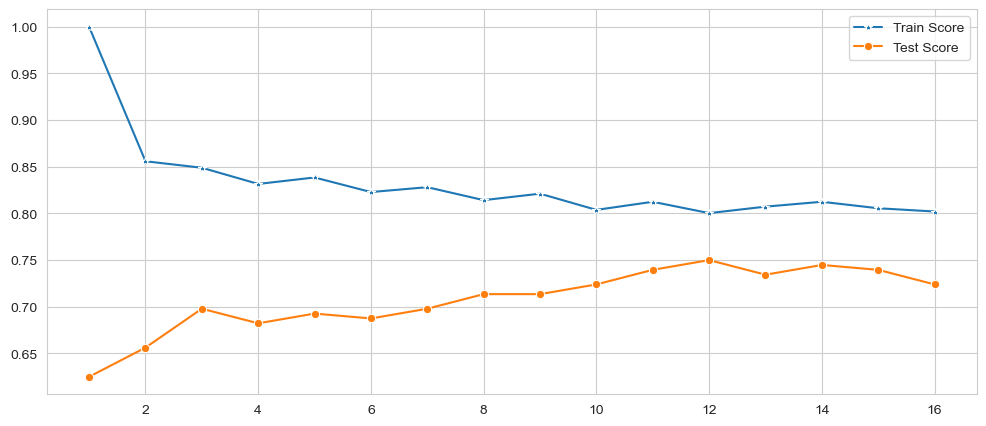

In [17]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=k_range,y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=k_range,y=test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [18]:
best_knn = KNeighborsClassifier(n_neighbors=12)
best_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=12)

In [19]:
y_pred = best_knn.predict(X_test_scaled)
pl = confusion_matrix(y_test, y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

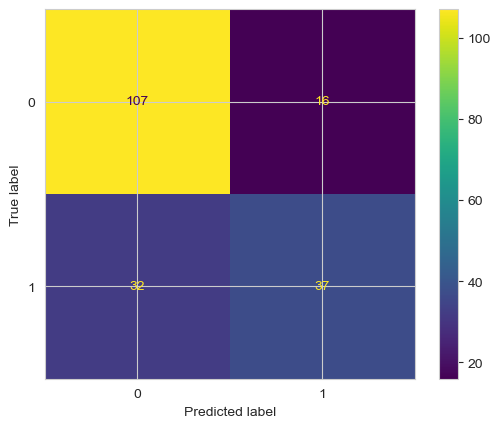

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

**<font color='teal'> Print the classification report </font>**

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       123
           1       0.70      0.54      0.61        69

    accuracy                           0.75       192
   macro avg       0.73      0.70      0.71       192
weighted avg       0.74      0.75      0.74       192


#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [22]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [23]:
print("Best Score: " + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score: 0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 31 based on the grid search performed. 

Optimal performance with added scaling step:

In [24]:
scaled_knn_cv = GridSearchCV(knn,param_grid,cv=5)
X_scaled = StandardScaler().fit_transform(X)
scaled_knn_cv.fit(X_scaled, y)
print("Best Score: " + str(scaled_knn_cv.best_score_))
print("Best Parameters: " + str(scaled_knn_cv.best_params_))

Best Score: 0.7721840251252015
Best Parameters: {'n_neighbors': 25}


**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Random Forest model.
</font>**

In [25]:
rf = RandomForestClassifier()
scaled_rf_cv = GridSearchCV(rf, {'n_estimators':np.arange(1, 50)},cv=5)
scaled_rf_cv.fit(X_scaled, y)
print("Best Score: " + str(scaled_rf_cv.best_score_))
print("Best Parameters: " + str(scaled_rf_cv.best_params_))

Best Score: 0.7747899159663866
Best Parameters: {'n_estimators': 39}


Random Forest with 39 trees has nearly the same accuracy but requires 5x longer computation time.